In [54]:
import numpy as np
from matplotlib import pyplot as plt
# from src.kalman import Kalman

In [55]:
n = 10

x1 = np.linspace(10,5,n)
x1 = x1.reshape(n,1)
x2 = np.linspace(0,-5,n)
x2 = x2.reshape(n,1)
y1 = np.linspace(10,5,n)
y1 = y1.reshape(n,1)
y2 = np.linspace(0,-5,n)
y2 = y2.reshape(n,1)

zero = np.zeros((n,1))


x = np.vstack((np.vstack((x1,zero)),x2))
y = np.vstack((np.vstack((y1,zero)),y2))


def noiseVector(n):
    """
    Generates a vector of noise values
    """
    return np.random.randn(n*3)[0] 

noisex = noiseVector(n)
noisey = noiseVector(n)
noisez = noiseVector(n)

model_z = 2*x + 0.1*y

measurement_z = model_z + noisez

model = np.array([x,y,model_z]).reshape(3,3*n)

measurement = np.array([x+noisex,y+noisey,measurement_z]).reshape(3,3*n)

#make the middle part of measurement zero
measurement[:,n:2*n] = np.zeros((3,n))


measurement.T[0], measurement.T[-1], model.T[0], model.T[-1]

(array([10.75542779,  8.82083477, 20.31100671]),
 array([ -4.24457221,  -6.17916523, -11.18899329]),
 array([10., 10., 21.]),
 array([ -5. ,  -5. , -10.5]))

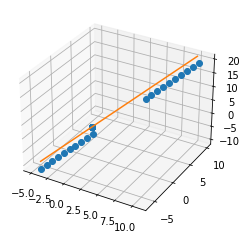

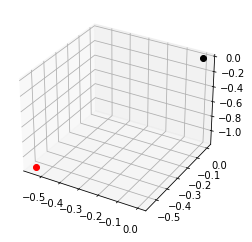

In [56]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')

v = -(model.T[0] - model.T[1])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot(v[0],v[1],v[2],'o',label='v',color='red')
ax.plot(0,0,0,'o',label='origin',color='black')

In [62]:
class Kalman:
    def __init__(self, measurements, v, x0, P0):
        self.measurements = measurements
        self.x = x0
        self.P = P0
        self.v = v # velocity vector measured in distance pr timestep
        self.Q = None
        self.R = None
        self.x = None
        # self.kalmanEstimates = self.positionUpdate()
    
    def kalmanPosition(self, measurement, x_prediction, P_prediction):
        newData = 1
        """
        Kalman filter for position
        input:
            measurement: measured x,y,z
            x_prediction: x,y,z prediction from previous iteration
            P_prediction: covariance matrix from previous iteration
            Q: process noise covariance matrix
            R: measurement noise covariance matrix
            k: iteration number
        output:
            x_prediction: x,y,z prediction from current iteration
            P_prediction: covariance matrix from current iteration
        """
        
        A = np.eye(3)
        B = self.v 


        # Prediction
        x_prediction = A @ x_prediction + B
        P_prediction = A @ P_prediction @ A.T + self.Q


        # Update
        if measurement[0] != 0:
            H = np.eye(3)
            K = P_prediction @ H.T @ np.linalg.inv(H @ P_prediction @ H.T + self.R)
            x_prediction = x_prediction + K @ (measurement - H @ x_prediction)
            P_prediction = (np.eye(3) - K @ H) @ P_prediction
        
        ############### USE THIS WHEN ACTUAL LISTS ARE INPUT ###############
        # if newData:
        #     H = np.eye(3)
        #     K = P_prediction @ H.T @ np.linalg.inv(H @ P_prediction @ H.T + R)
        #     x_prediction = x_prediction + K @ (measurement - H @ x_prediction)
        #     P_prediction = (np.eye(3) - K @ H) @ P_prediction


        return x_prediction, P_prediction

    def positionUpdate(self):
        kalman_estimates = np.zeros_like(self.measurements).T
        kalman_estimates[0] = self.x
        newData = 1
        for i in range(len(self.measurements)-2):
            print("iteration ", i+1)
            self.x, self.P = self.kalmanPosition(self.measurements.T[i], self.x, self.P)
            kalman_estimates[i+1] = self.x
        return kalman_estimates

r_xy = 3
r_z = 3
x_init = model.T[0]
# print("x: ",x_init)
# print(measurement.T[0])

P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])

kalman = Kalman(measurement, v, x_init, P_init)
# print(x_init)
# kalman_estimate = kalman.positionUpdate()
# kalmanEstimates = kalman.positionUpdate()
# P_init@measurement.T[0]
# x_init.shape
kalman.x = x_init

kalman_estimates = kalman.positionUpdate()


iteration  1


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [24]:

def kalmanPosition(measurement, x_prediction, P_prediction, Q, R,k):
    """
    Kalman filter for position
    input:
        measurement: measured x,y,z
        x_prediction: x,y,z prediction from previous iteration
        P_prediction: covariance matrix from previous iteration
        Q: process noise covariance matrix
        R: measurement noise covariance matrix
        k: iteration number
    output:
        x_prediction: x,y,z prediction from current iteration
        P_prediction: covariance matrix from current iteration
    """
    # A = np.array([[v[0]*k,0,0],[0,v[1]*k,0],[0,0,v[2]*k]])
    A = np.eye(3)
    B = v 
    
    # Prediction
    x_prediction = A @ x_prediction + B
    P_prediction = A @ P_prediction @ A.T + Q
    

    # Update
    if measurement[0] != 0:
        H = np.eye(3)
        K = P_prediction @ H.T @ np.linalg.inv(H @ P_prediction @ H.T + R)
        x_prediction = x_prediction + K @ (measurement - H @ x_prediction)
        P_prediction = (np.eye(3) - K @ H) @ P_prediction


    return x_prediction, P_prediction



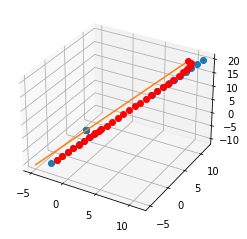

In [ ]:
k=1
r_xy = 3
r_z = 3
x_init = model.T[0]

P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])

kalman_estimates = np.zeros_like(measurement).T
kalman_estimates[0] = x_init

for i in range(n*3-1):
    x_prediction, P_prediction = kalmanPosition(measurement.T[i],x_init,P_init,Q_init,R_init,k)
    kalman_estimates[i+1] = x_prediction
    x_init = x_prediction
    P_init = P_prediction
    

kalman_estimates = kalman_estimates.T

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')
ax.plot(kalman_estimates[0],kalman_estimates[1],kalman_estimates[2],'o',label='kalman_estimates',color='red')

In [ ]:
# for i in range(n):
    # print(kalman_estimates.T[i],model.T[i])

kalman_estimates.T[0],model.T[0],kalman_estimates.T[-1],model.T[-1]



(array([10., 10., 21.]),
 array([10., 10., 21.]),
 array([ -3.22872166,  -2.53742871, -10.31588822]),
 array([ -5. ,  -5. , -10.5]))